## Let's see how the runtime depends on n. We will use chimeras from 1 to 10. We'll also test versus Dan's solver.

In [1]:
using Laplacians
include("../../src/samplingSolver.jl")

purge (generic function with 1 method)

In [2]:
numChimeras = 3;
minSize = 10;
maxSize = 1000;

In [3]:
time = [Float64[] for i in 1:10]
dantime = [Float64[] for i in 1:10]
rho = [Int64[] for i in 1:10]
ns = Int64[]

0-element Array{Int64,1}

In [4]:
for n in minSize:maxSize
    push!(ns, n)
    
    for i in 1:numChimeras
        A = chimera(n, i)
        L = lap(A)
        
        # find the min rho such that we get three consecutive runs with error(gOp) < 1
        left = 0.0
        right = 10

        good = right

        while left + 1e-5 < right
            mid = (left + right) / 2

            f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = mid);
            e1 = checkError(gOp)

            f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = mid);
            e2 = checkError(gOp)

            f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = mid);
            e3 = checkError(gOp)

            if (e1 < 1 && e2 < 1 && e3 < 1)
                good = mid
                right = mid
            else
                left = mid
            end
        end

        push!(rho[i], ceil(Int64, good * log(n) ^ 2 / 0.5 ^ 2))

        tic()
        f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = good);
        t = toc();
        push!(time[i], t)

        tic()
        augTreeSolver(L, tol = 1e-1, maxits = 1000, treeAlg = randishPrim);
        t = toc()
        push!(dantime[i], t)
        
        println("***** Done for chimera ", i)
        
    end
    
    println("******************* Done for size ", n)
end

elapsed time: 8.4845e-5 seconds
elapsed time: 0.660051739 seconds
***** Done for chimera 1
elapsed time: 4.6809e-5 seconds
elapsed time: 0.000210451 seconds
***** Done for chimera 2
elapsed time: 9.2944e-5 seconds
elapsed time: 0.000192578 seconds
***** Done for chimera 3
******************* Done for size 10
elapsed time: 8.189e-5 seconds
elapsed time: 0.000277608 seconds
***** Done for chimera 1
elapsed time: 5.6726e-5 seconds
elapsed time: 0.00018625 seconds
***** Done for chimera 2
elapsed time: 5.6665e-5 seconds
elapsed time: 0.00020051 seconds
***** Done for chimera 3
******************* Done for size 11
elapsed time: 5.0477e-5 seconds
elapsed time: 0.000245927 seconds
***** Done for chimera 1
elapsed time: 6.1373e-5 seconds
elapsed time: 0.000189631 seconds
***** Done for chimera 2
elapsed time: 6.7839e-5 seconds
elapsed time: 0.000291472 seconds
***** Done for chimera 3
******************* Done for size 12
elapsed time: 6.4177e-5 seconds
elapsed time: 0.000199803 seconds
***** D

## Let's see how the samplingSolver performs

In [5]:
using PyPlot

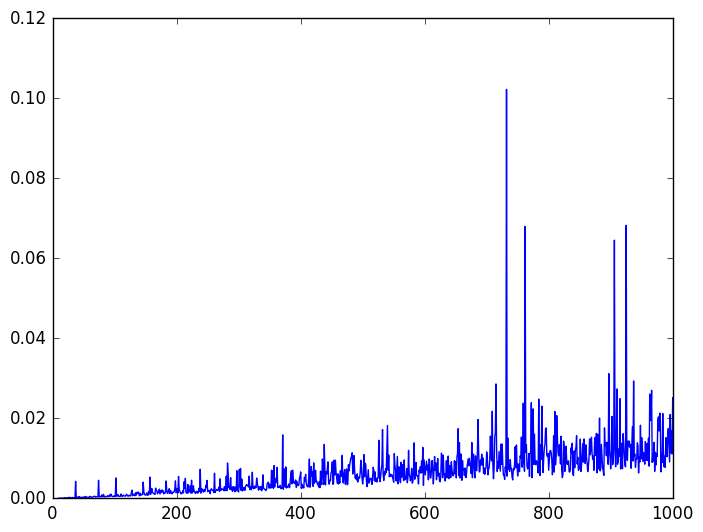

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x30b98c110>

In [6]:
plot(ns, time[1])

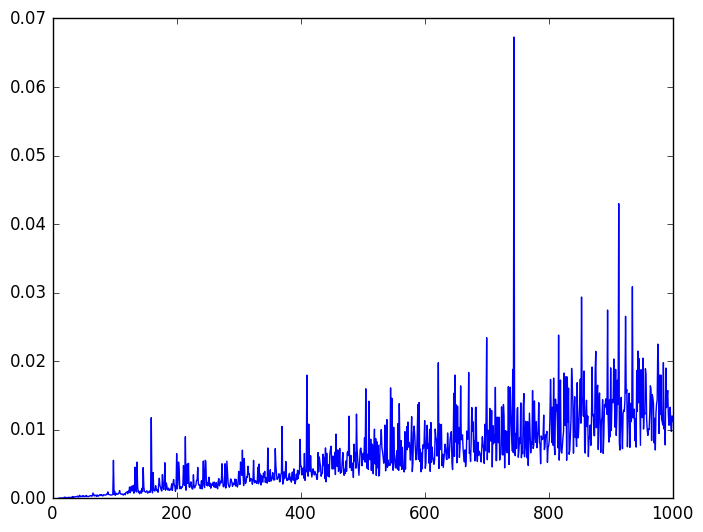

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31cdb6b90>

In [8]:
plot(ns, time[2])

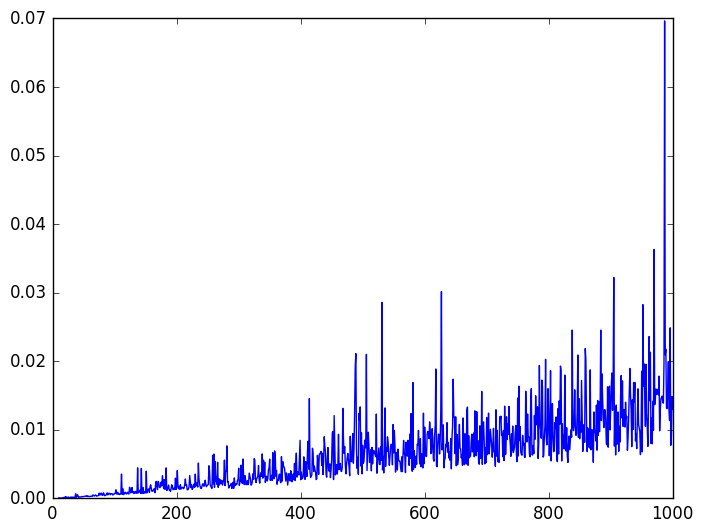

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32069a910>

In [11]:
plot(ns, time[3])

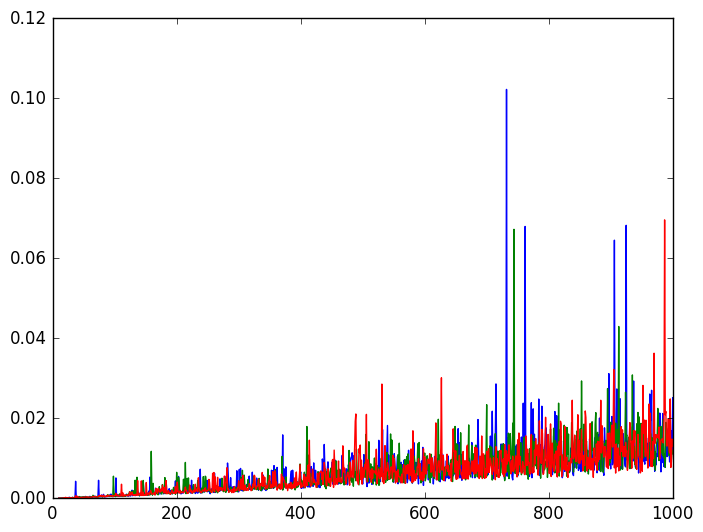

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32072c890>

In [12]:
plot(ns, time[1])
plot(ns, time[2])
plot(ns, time[3])

# Let's look at the rhos

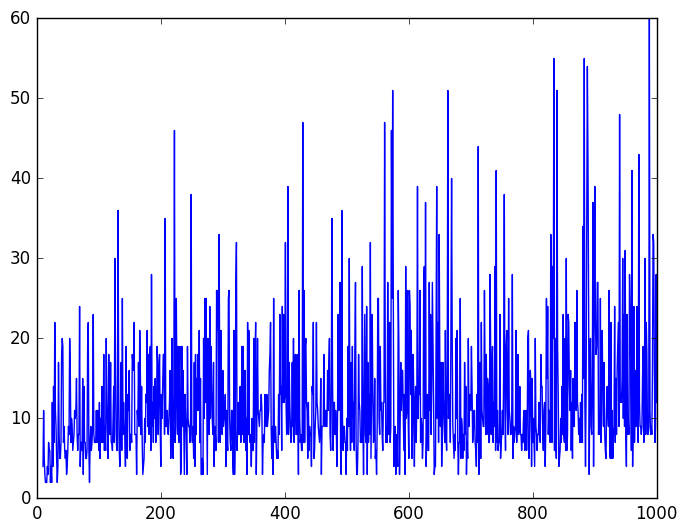

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32164e750>

In [17]:
plot(ns, rho[1])

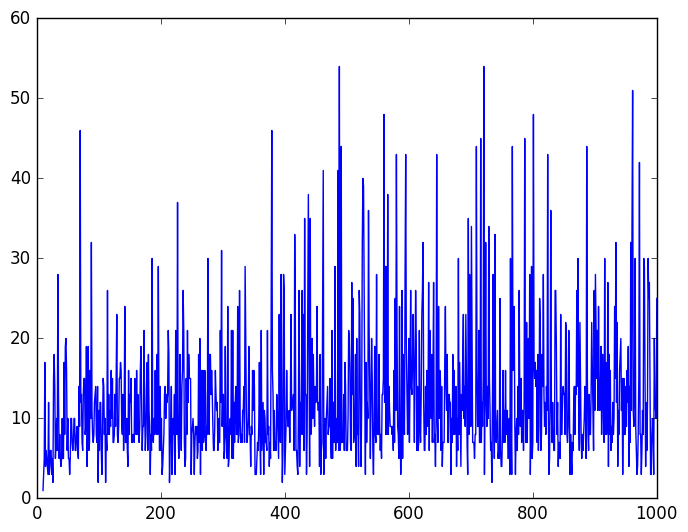

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3219d8f50>

In [18]:
plot(ns, rho[2])

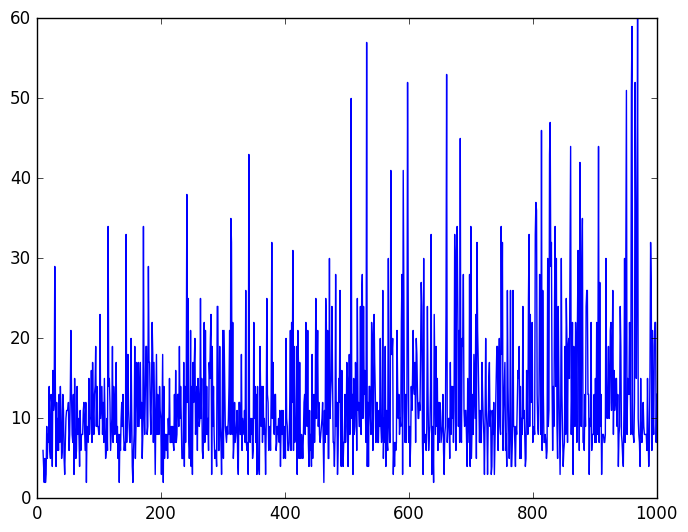

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x321d77090>

In [19]:
plot(ns, rho[3])

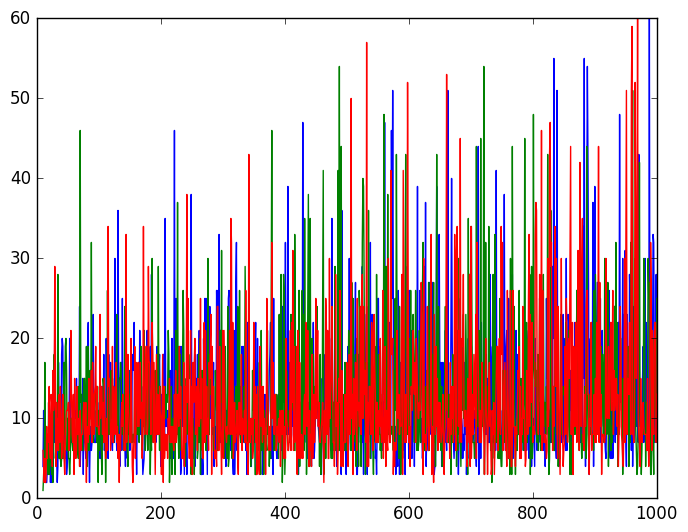

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x321da6fd0>

In [21]:
plot(ns, rho[1])
plot(ns, rho[2])
plot(ns, rho[3])

# Dan's builder time

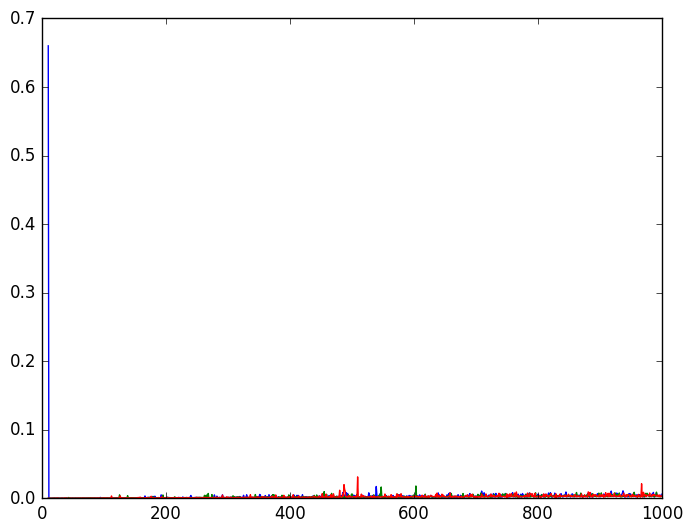

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x322285110>

In [23]:
plot(ns, dantime[1])
plot(ns, dantime[2])
plot(ns, dantime[3])

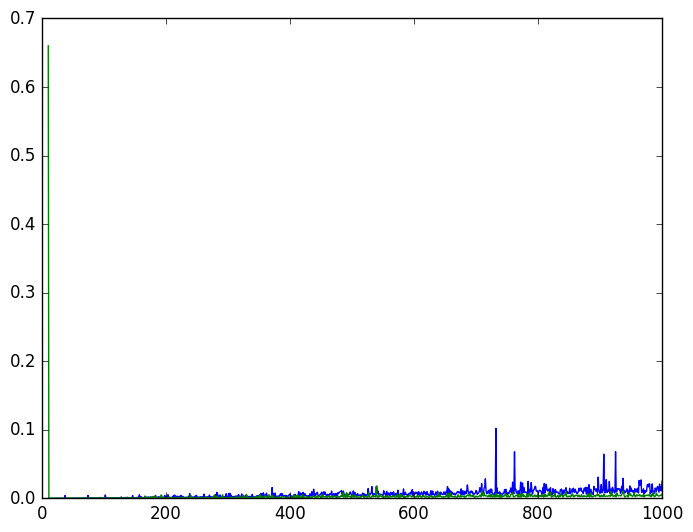

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x322d1eb90>

In [25]:
plot(ns, time[1])
plot(ns, dantime[1])

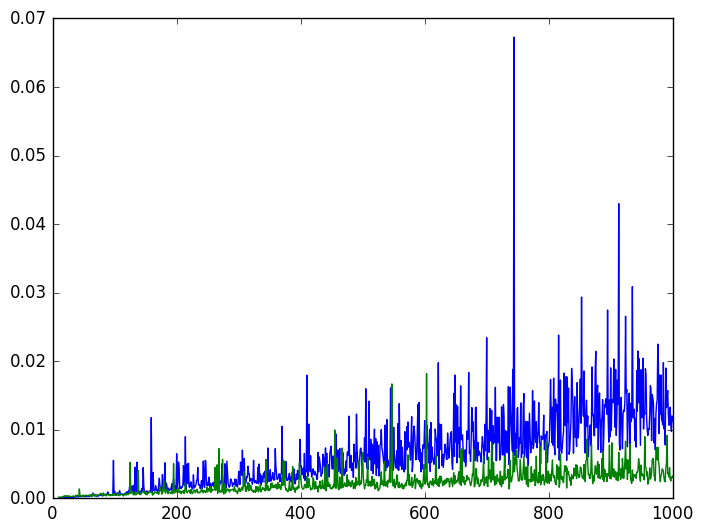

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x322d03710>

In [26]:
plot(ns, time[2])
plot(ns, dantime[2])

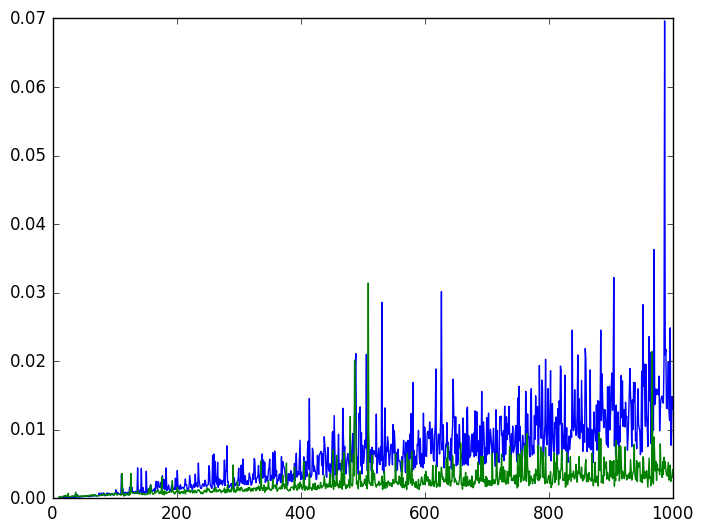

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3232a8990>

In [27]:
plot(ns, time[3])
plot(ns, dantime[3])

# Let's now check out some examples for a larger n

In [35]:
numChimeras = 3;
minSize = 10000;
maxSize = 10010;

In [36]:
time = [Float64[] for i in 1:10]
dantime = [Float64[] for i in 1:10]
rho = [Int64[] for i in 1:10]
ns = Int64[]

0-element Array{Int64,1}

In [37]:
for n in minSize:maxSize
    push!(ns, n)
    
    for i in 1:numChimeras
        A = chimera(n, i)
        L = lap(A)
        
        # find the min rho such that we get three consecutive runs with error(gOp) < 1
        left = 0.0
        right = 2

        good = right

        while left + 1e-2 < right
            mid = (left + right) / 2

            f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = mid);
            e1 = checkError(gOp)

            f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = mid);
            e2 = checkError(gOp)

            f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = mid);
            e3 = checkError(gOp)

            if (e1 < 1 && e2 < 1 && e3 < 1)
                good = mid
                right = mid
            else
                left = mid
            end
        end

        push!(rho[i], ceil(Int64, good * log(n) ^ 2 / 0.5 ^ 2))

        tic()
        f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = good);
        t = toc();
        push!(time[i], t)

        tic()
        augTreeSolver(L, tol = 1e-1, maxits = 1000, treeAlg = randishPrim);
        t = toc()
        push!(dantime[i], t)
        
        println("***** Done for chimera ", i)
        
    end
    
    println("******************* Done for size ", n)
end

elapsed time: 0.206774624 seconds
elapsed time: 0.043619531 seconds
***** Done for chimera 1
elapsed time: 0.335982779 seconds
elapsed time: 0.043813254 seconds
***** Done for chimera 2
elapsed time: 0.542477053 seconds
elapsed time: 0.274745368 seconds
***** Done for chimera 3
******************* Done for size 10000
elapsed time: 0.202538135 seconds
elapsed time: 0.031884121 seconds
***** Done for chimera 1
elapsed time: 1.225840605 seconds
elapsed time: 0.07313117 seconds
***** Done for chimera 2
elapsed time: 0.302560831 seconds
elapsed time: 0.086537109 seconds
***** Done for chimera 3
******************* Done for size 10001
elapsed time: 0.288767613 seconds
elapsed time: 0.066752615 seconds
***** Done for chimera 1
elapsed time: 0.335842402 seconds
elapsed time: 0.057039252 seconds
***** Done for chimera 2
elapsed time: 0.318378525 seconds
elapsed time: 0.061885195 seconds
***** Done for chimera 3
******************* Done for size 10002
elapsed time: 0.292949667 seconds
elapsed ti

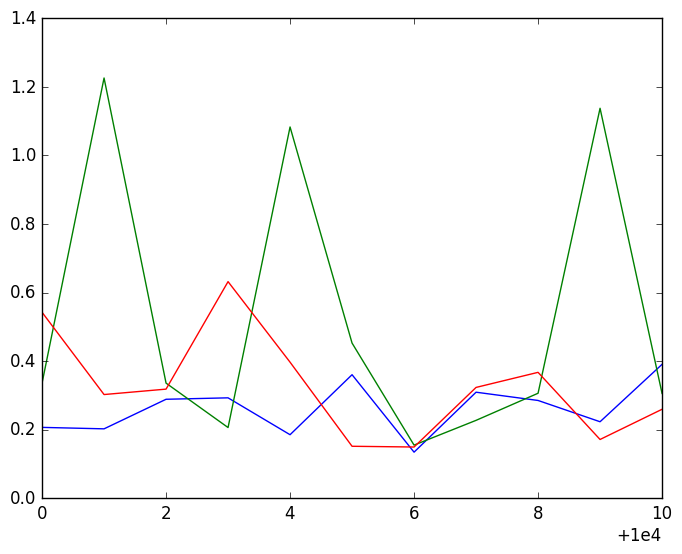

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3232c55d0>

In [38]:
plot(ns, time[1])
plot(ns, time[2])
plot(ns, time[3])

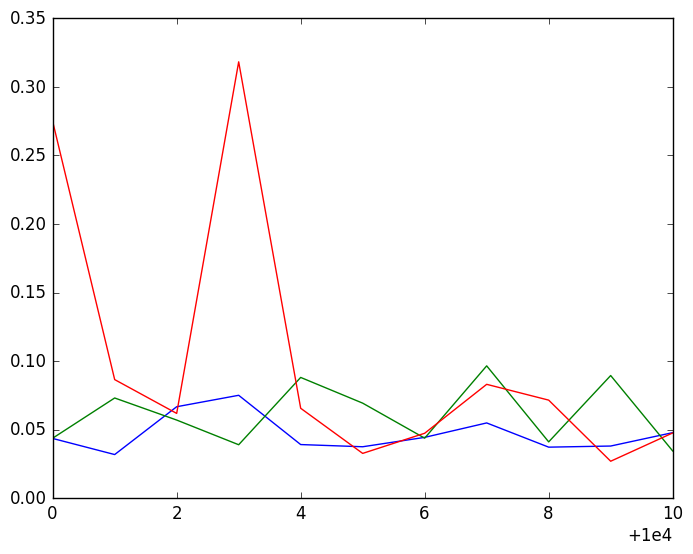

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3232e7a90>

In [39]:
plot(ns, dantime[1])
plot(ns, dantime[2])
plot(ns, dantime[3])

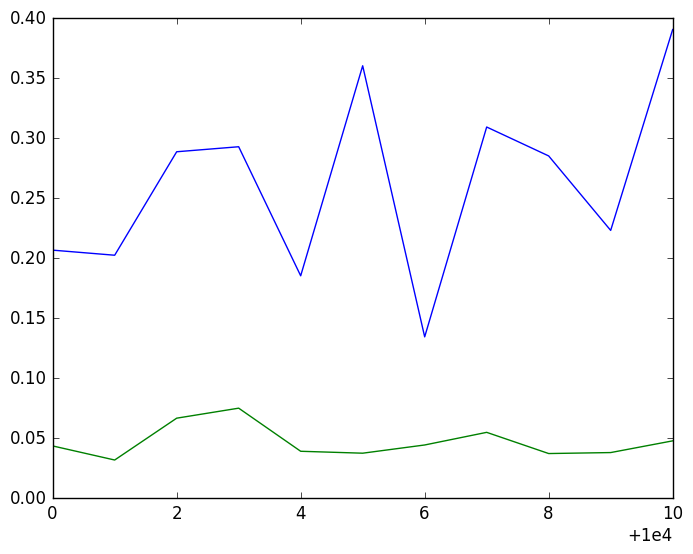

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32166e210>

In [40]:
plot(ns, time[1])
plot(ns, dantime[1])

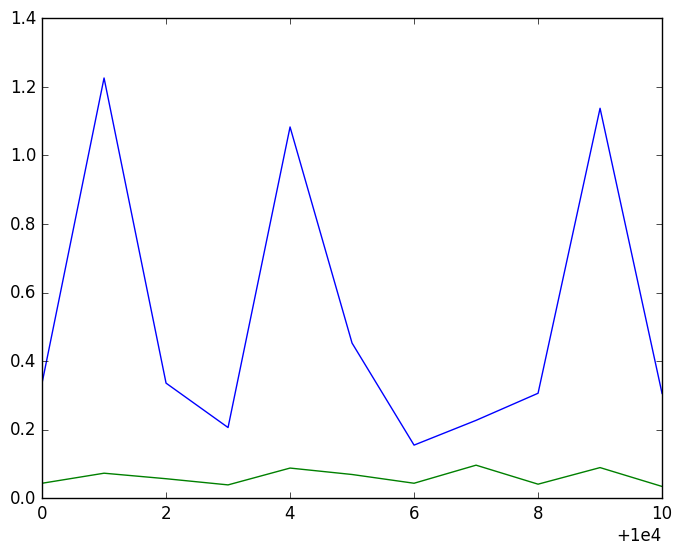

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x322114bd0>

In [41]:
plot(ns, time[2])
plot(ns, dantime[2])

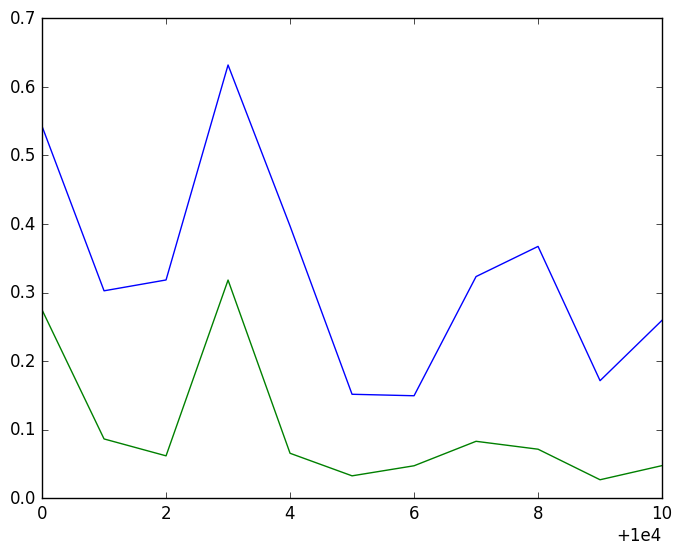

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3234a88d0>

In [42]:
plot(ns, time[3])
plot(ns, dantime[3])

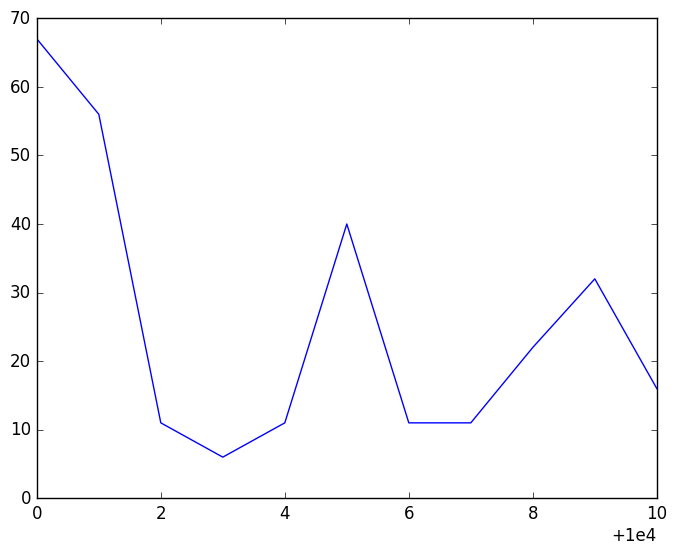

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x323cefc10>

In [43]:
plot(ns, rho[1])

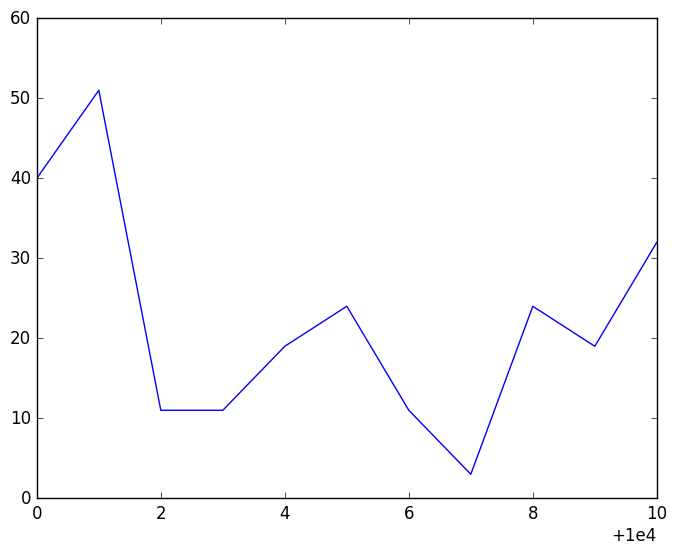

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x324400ed0>

In [44]:
plot(ns, rho[2])

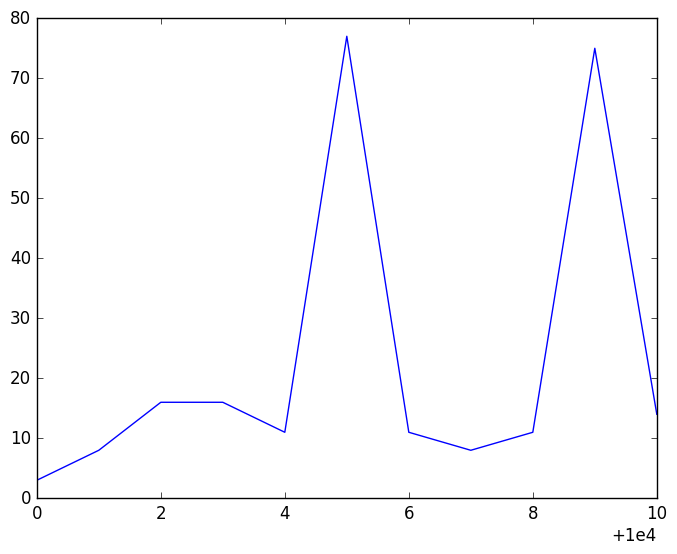

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x324f209d0>

In [45]:
plot(ns, rho[3])

# Let's now try some really big n s

In [46]:
n = 100000;

In [47]:
A = chimera(n, 1);
L = lap(A);

With 0.08 as the sampConst, rho is about 42.

In [55]:
@time f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = 0.08);

106.911241 seconds (6.48 M allocations: 14.881 GB, 55.78% gc time)


In [56]:
checkError(gOp)

0.3444845706544516

In [57]:
@time augTreeSolver(L, tol = 1e-1, maxits = 1000, treeAlg = randishPrim);

  1.316801 seconds (762.15 k allocations: 318.705 MB, 10.24% gc time)


Note build solver is writing 14GB.

In [62]:
A = chimera(n, 2);
L = lap(A);

In [63]:
@time f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = 0.08);

  4.543518 seconds (4.37 M allocations: 2.384 GB, 21.45% gc time)


In [64]:
checkError(gOp)

0.9852863589729218

In [65]:
@time augTreeSolver(L, tol = 1e-1, maxits = 1000, treeAlg = randishPrim);

  0.700712 seconds (272.61 k allocations: 191.424 MB, 6.97% gc time)


For chimera(n,2) the buildtime is pretty good. Let's try chimera(n,3).

In [58]:
A = chimera(n, 3);
L = lap(A);

In [59]:
@time f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = 0.08);

 14.852936 seconds (4.93 M allocations: 4.504 GB, 32.39% gc time)


In [60]:
checkError(gOp)

0.8901966476022145

In [61]:
@time augTreeSolver(L, tol = 1e-1, maxits = 1000, treeAlg = randishPrim);

  0.853888 seconds (402.96 k allocations: 225.341 MB, 5.65% gc time)


So, the max rho number of multiedges at all times seems to improve some graphs, but, as Rasmus said, there are graphs on which the improvement is minimal.